In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [2]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'

In [17]:
adata=sc.read('/Users/ursuo/Documents/research/baf/data/2021-06-17/single_guide/Baf.analysis.h5ad')
adata



/Users/ursuo/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/ursuo/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'SS18L_4', 'SMARCC1_2', 'SMARCC2_2', 'SMARCC1_1', 'BRD9_4', 'BRD7_1', 'SMARCD3_3', 'SMARCD2_3', 'SMARCB1_1', 'BCL7A_1', 'DPF2_1', 'SMARCC2_1', 'ARID1B_4', 'ARID1B_3', 'BRD7_2', 'BCL7C_4', 'SMARCD1_2', 'SMARCE1_2', 'SMARCD1_3', 'ARID2_3', 'DPF2_4', 'ARID2_2', 'BCL7B_1', 'GLTSCR1_4', 'SMARCA2_1', 'PHF10_2', 'SS18_4', 'SS18L_1', 'DPF2_2', 'NTC7_IG1144056', 'DPF3_1', 'GLTSCR1L_2', 'SMARCC1_7', 'DPF1_2', 'DPF1_1', 'ACTL6A_2', 'ARID1A_2', 'PBRM1_3', 'SMARCD2_2', 'ACTL6B_2', 'SMARCC1_5', 'BCL7A_3', 'BCL7C_1', 'ACTL6A_3', 'SMARCA4_1', 'BCL7B_3', 'BCL7A_4', 'ARID2_1', 'ARID1B_2', 'PBRM1_2', 'NTC5_mNTC100A67005', 'ACTL6A_1', 'BRD9_3', 'DPF2_3', 'SMARCD1_4', 'GLTSCR1_3', 'SMARCD3_1', 'SS18_3', 'ARID2_4', 'NTC2_IG216151', 'GLTSCR1L_4', 'BCL7B_2', 'SS18L_2', 'ACTL6B_1', 'BRD7_3', 'SMARCB1_5', 'SMARCE1_3', 'SMARCA4_4', 'ACTL6B_3', 'SMARCE1_4', 'DPF3_3', 'SMARCC2_3', 'SMARCE1_1', 'NTC6_IG1216445', 'SS18L_3', 'ARID1A_7', 'PHF10_3', '

In [18]:
for v in ['SS18L_4', 'SMARCC1_2', 'SMARCC2_2', 'SMARCC1_1', 'BRD9_4', 'BRD7_1', 'SMARCD3_3', 'SMARCD2_3', 'SMARCB1_1', 'BCL7A_1', 'DPF2_1', 'SMARCC2_1', 'ARID1B_4', 'ARID1B_3', 'BRD7_2', 'BCL7C_4', 'SMARCD1_2', 'SMARCE1_2', 'SMARCD1_3', 'ARID2_3', 'DPF2_4', 'ARID2_2', 'BCL7B_1', 'GLTSCR1_4', 'SMARCA2_1', 'PHF10_2', 'SS18_4', 'SS18L_1', 'DPF2_2', 'NTC7_IG1144056', 'DPF3_1', 'GLTSCR1L_2', 'SMARCC1_7', 'DPF1_2', 'DPF1_1', 'ACTL6A_2', 'ARID1A_2', 'PBRM1_3', 'SMARCD2_2', 'ACTL6B_2', 'SMARCC1_5', 'BCL7A_3', 'BCL7C_1', 'ACTL6A_3', 'SMARCA4_1', 'BCL7B_3', 'BCL7A_4', 'ARID2_1', 'ARID1B_2', 'PBRM1_2', 'NTC5_mNTC100A67005', 'ACTL6A_1', 'BRD9_3', 'DPF2_3', 'SMARCD1_4', 'GLTSCR1_3', 'SMARCD3_1', 'SS18_3', 'ARID2_4', 'NTC2_IG216151', 'GLTSCR1L_4', 'BCL7B_2', 'SS18L_2', 'ACTL6B_1', 'BRD7_3', 'SMARCB1_5', 'SMARCE1_3', 'SMARCA4_4', 'ACTL6B_3', 'SMARCE1_4', 'DPF3_3', 'SMARCC2_3', 'SMARCE1_1', 'NTC6_IG1216445', 'SS18L_3', 'ARID1A_7', 'PHF10_3', 'DPF1_3', 'ARID1A_3', 'SMARCA2_2', 'DPF3_4', 'SMARCA4_7', 'SMARCC2_4', 'SMARCD2_4', 'SMARCA2_3', 'PHF10_1', 'GLTSCR1_1', 'ACTL6A_4', 'BRD7_4', 'ARID1A_5', 'BCL7C_3', 'SS18_2', 'BCL7A_2', 'PHF10_4', 'GLTSCR1L_3', 'SMARCB1_8', 'DPF1_4', 'SMARCD2_1', 'ARID1B_1', 'SMARCD1_1', 'SMARCD3_2', 'BRD9_1', 'BCL7C_2', 'NTC1_IG345439', 'SMARCA4_5', 'DPF3_2', 'SS18_1', 'BRD9_2', 'PBRM1_4', 'SMARCD3_4', 'PBRM1_1', 'SMARCA2_4', 'ACTL6B_4', 'GLTSCR1L_1', 'SMARCB1_7', 'BCL7B_4', 'gene', 'guide',
          'G1.S', 'G2.M', 'M', 'M.G1', 'S', 'phase.multi', 'gene_name2', 'SS18', 'BRD7', 'multiple', 'BCL7A', 'SMARCD2', 'ACTL6B', 'SMARCE1', 'DPF3', 'SMARCC2', 'PBRM1', 'NTC6', 'SS18L', 'BCL7C', 'SMARCD3', 'NTC1', 'ARID2', 'DPF1', 'BRD9', 'ARID1A', 'GLTSCR1L', 'SMARCA4', 'NTC2', 'ACTL6A', 'NTC7', 'DPF2', 'SMARCB1', 'SMARCD1', 'PHF10', 'GLTSCR1', 'SMARCA2', 'NTC5', 'ARID1B', 'BCL7B', 'NA', 'SMARCC1', 'guide.perturbations_per_cell', 'gene.perturbations_per_cell', 'doublet_scores', 'predicted_doublets', 'guide_conf',
         ]:
    del adata.obs[v]
    
    
    

In [19]:
for v in ['gene.cells_per_perturbation', 'gene.cells_per_perturbation.singly_infected', 'gene_colors', 'guide.cells_per_perturbation', 'guide.cells_per_perturbation.singly_infected', 'guide_colors', 'guide_conf_colors',
         'phase.multi_colors',
         ]:
    del adata.uns[v]
    
    
    

In [20]:
adata

AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Detection_probability', 'MOI', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [21]:
guide2gene_file='/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide/Baf.single_gene.guide2gene.csv.gz'
g2g=pd.read_csv(guide2gene_file,sep='\t')

#name controls as controls, not NTC
g2g.loc[g2g['gene']=='NTC','gene']='control'
g2g.to_csv(guide2gene_file+'.control.gz',sep='\t')


In [22]:
cells2guide_file='/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide/Baf.single_gene.cell2guide.csv.gz'
guide2gene_file='/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide/Baf.single_gene.guide2gene.csv.gz'+'.control.gz'

perturb.io.read_perturbations_csv(adata,
                       cell2guide_csv=cells2guide_file,
                      guide2gene_csv=guide2gene_file,
                      pref='')

adata cells: 52152
annotated cells: 37454 or 72.0 percent of adata


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [23]:
adata.uns['guide2gene']

,Unnamed: 0,guide,gene
ACTL6A_1,0,ACTL6A_1,ACTL6A
ACTL6A_2,1,ACTL6A_2,ACTL6A
ACTL6A_3,2,ACTL6A_3,ACTL6A
ACTL6A_4,3,ACTL6A_4,ACTL6A
ACTL6B_1,4,ACTL6B_1,ACTL6B
...,...,...,...
SS18L_4,111,SS18L_4,SS18L
SS18_1,112,SS18_1,SS18
SS18_2,113,SS18_2,SS18
SS18_3,114,SS18_3,SS18


In [24]:
set(adata[adata.obs['control']>0,:].obs['guide.compact'])

{'NTC1_IG345439',
 'NTC2_IG216151',
 'NTC5_mNTC100A67005',
 'NTC6_IG1216445',
 'NTC7_IG1144056',
 'multiple'}

In [25]:
adata.write(pref+'.full.h5ad')

... storing 'guide' as categorical
... storing 'guide.compact' as categorical
... storing 'gene' as categorical
... storing 'gene.compact' as categorical


Stopping point
===

In [26]:
adata=sc.read(pref+'.full.h5ad')
adata

Only considering the two last: ['.full', '.h5ad'].
Only considering the two last: ['.full', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [27]:
perturb.pp.perturbs_per_cell(adata)

Found 116/116 


In [28]:
adata.obs['perturbs_per_cell.guide']

AAACCCAAGAGAGGTA-1-0     0
AAACCCACACGGTGTC-1-0     0
AAACCCACAGATTAAG-1-0     0
AAACCCAGTAGCGAGT-1-0     1
AAACCCATCAAGAAAC-1-0     1
                        ..
TTTGTTGCACCACTGG-1-14    0
TTTGTTGGTAACCCTA-1-14    0
TTTGTTGGTTGAATCC-1-14    1
TTTGTTGTCAAGTAAG-1-14    1
TTTGTTGTCCATCGTC-1-14    0
Name: perturbs_per_cell.guide, Length: 52152, dtype: int64

In [29]:
gs_per_cell=adata.obs['perturbs_per_cell.guide']
gs_per_cell.value_counts()

1     30891
0     14800
2      4998
3      1044
4       299
5        72
6        26
7        15
8         5
10        1
18        1
Name: perturbs_per_cell.guide, dtype: int64

In [30]:
total=gs_per_cell.shape[0]
print('total cells',gs_per_cell.shape[0])
print('multiple',(gs_per_cell>1).sum(),100*(gs_per_cell>1).sum()/total)
print('unassigned',(gs_per_cell==0).sum(),100*(gs_per_cell==0).sum()/total)
print('one guide per cell',(gs_per_cell==1).sum(),100*(gs_per_cell==1).sum()/total)

total cells 52152
multiple 6461 12.388786623715294
unassigned 14800 28.37858567264918
one guide per cell 30891 59.23262770363553


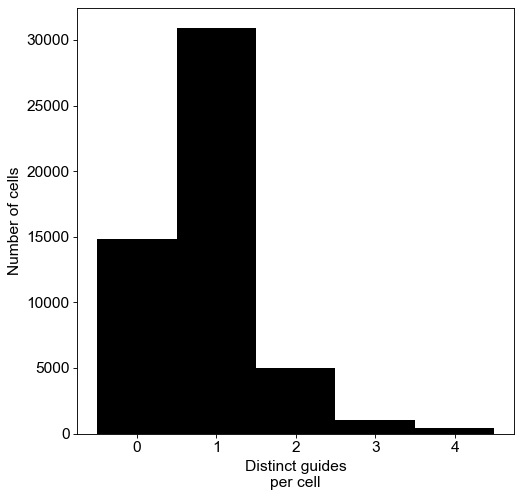

In [31]:
fig,plots=plt.subplots(1)
fig.set_size_inches(7,7)
perturb.pl.perturbs_per_cell(adata,ax=plots)
plt.savefig(FIGS+'single.perturbs_per_cell.pdf',transparent=True)
plt.savefig(FIGS+'single.perturbs_per_cell.png',transparent=True)

In [32]:
perturb.pp.cells_per_perturb(adata)

Found 116/116 perturbations


Found 116/116 perturbations
30891.0
45904.0


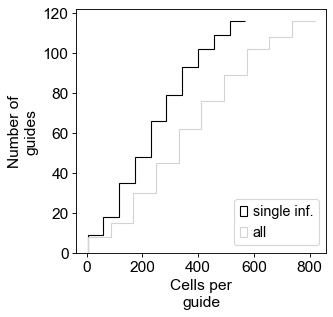

In [33]:
perturb.pl.cells_per_perturb(adata)

In [34]:
adata

AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

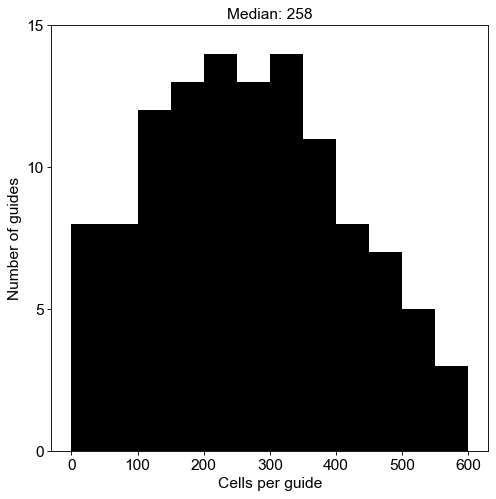

In [35]:
c2p=adata.uns['cells_per_individual_perturb.guide.singly_inf']

fig,plots=plt.subplots(1)
fig.set_size_inches(7,7)

plots.hist(c2p,[x*50 for x in range(13)],color='black')
plots.grid(False)
plots.set_yticks([0,5,10,15])
plots.set_ylabel('Number of guides')
plots.set_xlabel('Cells per guide')
plots.set_title('Median: '+str(int(np.median(c2p))))

plt.savefig(FIGS+'single.cells_per_perturb.pdf',transparent=True)
plt.savefig(FIGS+'single.cells_per_perturb.png',transparent=True)

In [36]:
perturb.pp.cells_per_perturb(adata,perturbations_obs='gene')

Found 29/29 perturbations


Found 116/116 perturbations
31102.0
45393.0


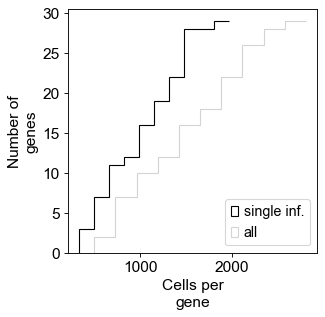

In [37]:
perturb.pl.cells_per_perturb(adata,perturbations_obs='gene')

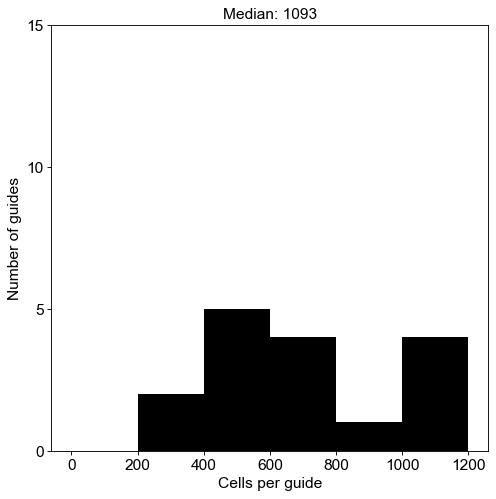

In [38]:
c2p=adata.uns['cells_per_individual_perturb.gene.singly_inf']

fig,plots=plt.subplots(1)
fig.set_size_inches(7,7)

plots.hist(c2p,[x*200 for x in range(7)],color='black')
plots.grid(False)
plots.set_yticks([0,5,10,15])
plots.set_ylabel('Number of guides')
plots.set_xlabel('Cells per guide')
plots.set_title('Median: '+str(int(np.median(c2p))))

plt.savefig(FIGS+'single.cells_per_gene.pdf',transparent=True)
plt.savefig(FIGS+'single.cells_per_gene.png',transparent=True)

... storing 'SMARCC2_3' as categorical
... storing 'BCL7C_4' as categorical
... storing 'BRD7_4' as categorical
... storing 'ACTL6B_2' as categorical
... storing 'PBRM1_4' as categorical
... storing 'SMARCA2_1' as categorical
... storing 'SMARCE1_1' as categorical
... storing 'PBRM1_3' as categorical
... storing 'SMARCE1_2' as categorical
... storing 'GLTSCR1L_3' as categorical
... storing 'PHF10_3' as categorical
... storing 'BRD7_3' as categorical
... storing 'GLTSCR1L_2' as categorical
... storing 'ARID2_4' as categorical
... storing 'ARID1A_3' as categorical
... storing 'SS18_2' as categorical
... storing 'DPF1_3' as categorical
... storing 'SMARCA4_1' as categorical
... storing 'DPF3_2' as categorical
... storing 'ACTL6A_3' as categorical
... storing 'DPF3_3' as categorical
... storing 'SMARCA4_7' as categorical
... storing 'PBRM1_1' as categorical
... storing 'BCL7A_2' as categorical
... storing 'ARID1A_7' as categorical
... storing 'BCL7C_3' as categorical
... storing 'GLTSCR1_1

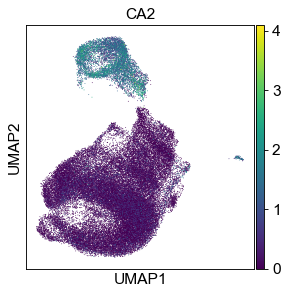

In [39]:
sc.pl.umap(adata,color='CA2')

In [40]:
keep=adata.obs_names[adata.obsm['X_umap'][:,1]<5.3]
print(len(keep))

45427


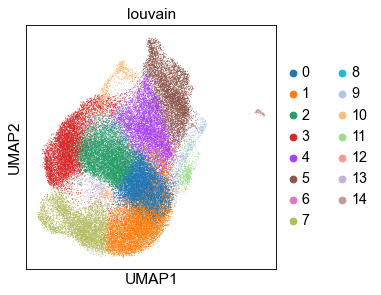

In [41]:
sc.pl.umap(adata[keep,:],color='louvain')

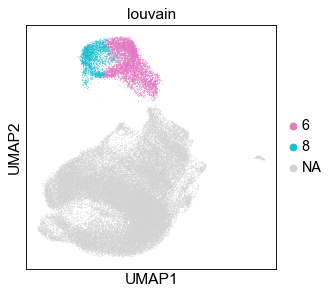

In [42]:
sc.pl.umap(adata,color='louvain',groups=['8','6'])

In [43]:
adata.obs['cell_state']='state2'
adata.obs['cell_state'][keep]='state1'

<ipython-input-43-971aa47af57c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['cell_state'][keep]='state1'
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


... storing 'cell_state' as categorical


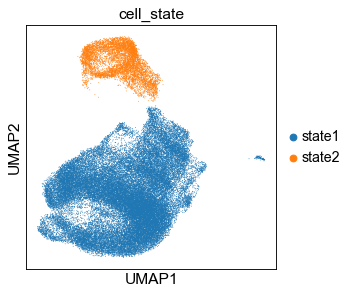

In [44]:
sc.pl.umap(adata,color='cell_state')

In [45]:
adata.write(pref+'.full.h5ad')

Stopping point
==

In [46]:
adata=sc.read(pref+'.full.h5ad')
adata

Only considering the two last: ['.full', '.h5ad'].
Only considering the two last: ['.full', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [47]:
#filter out guides that don't agree
filter_out=['GLTSCR1_2','SMARCC1_2',
            'SMARCE1_2','SMARCE1_4','GLTSCR1L_1','BCL7C_4','multiple']

In [48]:
adata.obs['guide_qc']='passed'
adata.obs['guide_qc'].loc[adata.obs['guide.compact'].isin(filter_out)]='failed'

In [49]:
adata

AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [50]:
adata.obs['guide_qc'].value_counts()

passed    44154
failed     7998
Name: guide_qc, dtype: int64

In [51]:
adata.write(pref+'.guide_qc.h5ad')

... storing 'guide_qc' as categorical


Stopping point
==

:::::::::::: Guide effects ::::::::::::
===

In [25]:
adata=sc.read(pref+'.guide_qc.h5ad')
adata

Only considering the two last: ['.guide_qc', '.h5ad'].
Only considering the two last: ['.guide_qc', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [26]:
#expression of the targeted gene
genes=set(adata.obs['gene.compact'])
print(genes)
print(len(genes))

{'BRD9', 'DPF1', 'SMARCC1', 'ACTL6A', 'SS18', 'unassigned', 'SMARCD3', 'ARID1A', 'GLTSCR1', 'SMARCE1', 'BCL7B', 'SMARCD1', 'SMARCD2', 'multiple', 'PBRM1', 'ACTL6B', 'DPF2', 'SMARCC2', 'BCL7C', 'ARID2', 'BRD7', 'DPF3', 'GLTSCR1L', 'SS18L', 'PHF10', 'SMARCB1', 'SMARCA2', 'control', 'BCL7A', 'SMARCA4', 'ARID1B'}
31


In [27]:
#sort by average expression of the genes
perturb.tl.bulk(adata,'gene.compact',use_raw=True,return_matrix=True)
genes_only=list(set(genes).difference(set(['control','unassigned','multiple'])))
gene_avg=pd.DataFrame({'gene':genes_only,'expr':0,
                       },
                     index=genes_only)

for gene in genes_only:
    if gene in adata.var_names:
        gene_avg.loc[gene,'expr']=adata.uns['bulk.gene.compact'].loc['control',gene]

gene_avg=gene_avg.sort_values(by='expr')
print(gene_avg.shape)
del adata.uns['bulk.gene.compact']
gene_avg.head()

(28, 2)


,gene,expr
ACTL6B,ACTL6B,0.000000
SS18L,SS18L,0.000000
DPF3,DPF3,0.000280
SMARCD3,SMARCD3,0.001967
DPF1,DPF1,0.002750


In [28]:
adata.uns['target_gene_expr_in_control']=gene_avg

In [29]:
import copy

guides=list(set(adata.obs['guide.compact']).difference(set(['multiple','unassigned'])))
guide2gene=adata.uns['guide2gene']

ntcs=['NTC1_IG345439','NTC2_IG216151','NTC5_mNTC100A67005','NTC6_IG1216445','NTC7_IG1144056']
rest=list(gene_avg.index)

#get the order of the guides
guides.sort()
ordered_guides=copy.deepcopy(ntcs)
for gene in rest:
    for g in list(guides):
        if gene==guide2gene.loc[g,'gene']:
            ordered_guides.append(g)
    
print(ordered_guides)
print(len(ordered_guides))

['NTC1_IG345439', 'NTC2_IG216151', 'NTC5_mNTC100A67005', 'NTC6_IG1216445', 'NTC7_IG1144056', 'ACTL6B_1', 'ACTL6B_2', 'ACTL6B_3', 'ACTL6B_4', 'SS18L_1', 'SS18L_2', 'SS18L_3', 'SS18L_4', 'DPF3_1', 'DPF3_2', 'DPF3_3', 'DPF3_4', 'SMARCD3_1', 'SMARCD3_2', 'SMARCD3_3', 'SMARCD3_4', 'DPF1_1', 'DPF1_2', 'DPF1_3', 'DPF1_4', 'GLTSCR1_1', 'GLTSCR1_3', 'GLTSCR1_4', 'GLTSCR1L_1', 'GLTSCR1L_2', 'GLTSCR1L_3', 'GLTSCR1L_4', 'SS18_1', 'SS18_2', 'SS18_3', 'SS18_4', 'SMARCD1_1', 'SMARCD1_2', 'SMARCD1_3', 'SMARCD1_4', 'DPF2_1', 'DPF2_2', 'DPF2_3', 'DPF2_4', 'ARID2_1', 'ARID2_2', 'ARID2_3', 'ARID2_4', 'SMARCC2_1', 'SMARCC2_2', 'SMARCC2_3', 'SMARCC2_4', 'BCL7C_1', 'BCL7C_2', 'BCL7C_3', 'BCL7C_4', 'SMARCA2_1', 'SMARCA2_2', 'SMARCA2_3', 'SMARCA2_4', 'BCL7B_1', 'BCL7B_2', 'BCL7B_3', 'BCL7B_4', 'SMARCB1_1', 'SMARCB1_5', 'SMARCB1_7', 'SMARCB1_8', 'SMARCD2_1', 'SMARCD2_2', 'SMARCD2_3', 'SMARCD2_4', 'ARID1B_1', 'ARID1B_2', 'ARID1B_3', 'ARID1B_4', 'PBRM1_1', 'PBRM1_2', 'PBRM1_3', 'PBRM1_4', 'BCL7A_1', 'BCL7A_2', 'B

In [30]:
genes=[]
for i in range(len(rest)):
    genes.append(rest[i])
print(genes)
print(len(genes))

['ACTL6B', 'SS18L', 'DPF3', 'SMARCD3', 'DPF1', 'GLTSCR1', 'GLTSCR1L', 'SS18', 'SMARCD1', 'DPF2', 'ARID2', 'SMARCC2', 'BCL7C', 'SMARCA2', 'BCL7B', 'SMARCB1', 'SMARCD2', 'ARID1B', 'PBRM1', 'BCL7A', 'ACTL6A', 'SMARCE1', 'ARID1A', 'BRD9', 'BRD7', 'SMARCA4', 'PHF10', 'SMARCC1']
28


In [31]:
import copy
df=copy.deepcopy(adata.obs['guide.compact']).astype(str)
df.loc[adata.obs['gene.compact']=='control']='control'
print(df)

adata.obs['guide.compact.with_control']=df

AAACCCAAGAGAGGTA-1-0     unassigned
AAACCCACACGGTGTC-1-0     unassigned
AAACCCACAGATTAAG-1-0     unassigned
AAACCCAGTAGCGAGT-1-0      SMARCB1_1
AAACCCATCAAGAAAC-1-0      SMARCC2_1
                            ...    
TTTGTTGCACCACTGG-1-14    unassigned
TTTGTTGGTAACCCTA-1-14    unassigned
TTTGTTGGTTGAATCC-1-14      ARID1A_5
TTTGTTGTCAAGTAAG-1-14        DPF3_4
TTTGTTGTCCATCGTC-1-14    unassigned
Name: guide.compact, Length: 52152, dtype: object


In [32]:
adata.uns['sorted_guides']=ordered_guides
adata.uns['sorted_genes']=genes

In [33]:
adata

AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

In [35]:
adata.write(pref+'.guide_qc.h5ad')

Plotting
==

In [36]:
adata=sc.read(pref+'.guide_qc.h5ad')
adata

Only considering the two last: ['.guide_qc', '.h5ad'].
Only considering the two last: ['.guide_qc', '.h5ad'].


AnnData object with n_obs × n_vars = 52152 × 21868
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS1

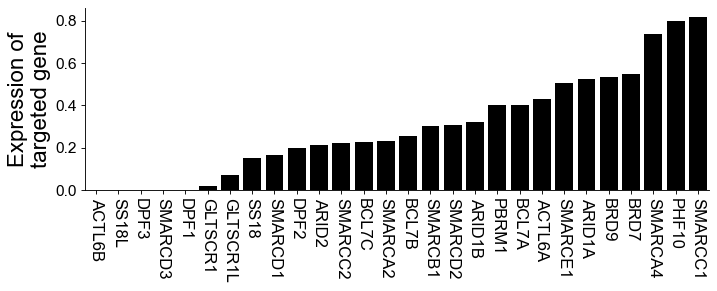

In [53]:
fig,plots=plt.subplots(1)
fig.set_size_inches(10,3)
vmin=-1
vmax=1

#expression level of genes
sorted_genes=adata.uns['sorted_genes']
plots.bar([x for x in range(len(sorted_genes))],
       list(adata.uns['target_gene_expr_in_control'].loc[sorted_genes,'expr']),color='black')
plots.grid(False)
#ax_top.set_xticks([])
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(True)
plots.spines['top'].set_visible(False)
plots.spines['bottom'].set_visible(True)
plots.set_xticks(range(len(sorted_genes)))
plots.set_xticklabels(sorted_genes,fontsize=15,rotation=270)
plots.xaxis.set_ticks_position('bottom')
plots.set_ylabel('Expression of\ntargeted gene',fontsize=20)
plots.set_xlim(-0.5,len(sorted_genes)-0.5)

plt.savefig(FIGS+'targeted_gene_expr_in_ctrl.bar.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'targeted_gene_expr_in_ctrl.bar.png',transparent=True,bbox_inches='tight')


In [55]:
x=perturb.pp.gene_mean_with_sig(adata,
                    gene_list=genes,
                    ref='control',
                   grouping_variable='gene.compact')

DPF3
SMARCD3
DPF1
GLTSCR1
GLTSCR1L
SS18
SMARCD1
DPF2
ARID2
SMARCC2
BCL7C
SMARCA2
BCL7B
SMARCB1
SMARCD2
ARID1B
PBRM1
BCL7A
ACTL6A
SMARCE1
ARID1A
BRD9
BRD7
SMARCA4
PHF10
SMARCC1


/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


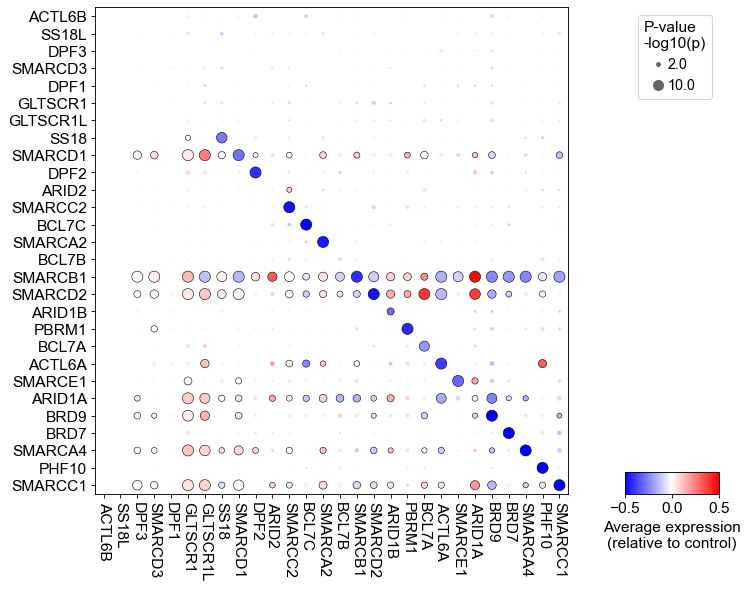

In [56]:
perturb.pl.dotplot2(x[0],x[1],genes[::-1],genes[::1],w=10,h=8,best_p=1e-10,
        title='Average expression\n(relative to control)')

plt.savefig(FIGS+'gene.ko.dotplot.pdf',transparent=True)
plt.savefig(FIGS+'gene.ko.dotplot.png',transparent=True)

In [ ]:
x=perturb.pp.gene_mean_with_sig(adata,
                    gene_list=genes,
                    ref='control',
                   grouping_variable='guide.compact.with_control')

/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


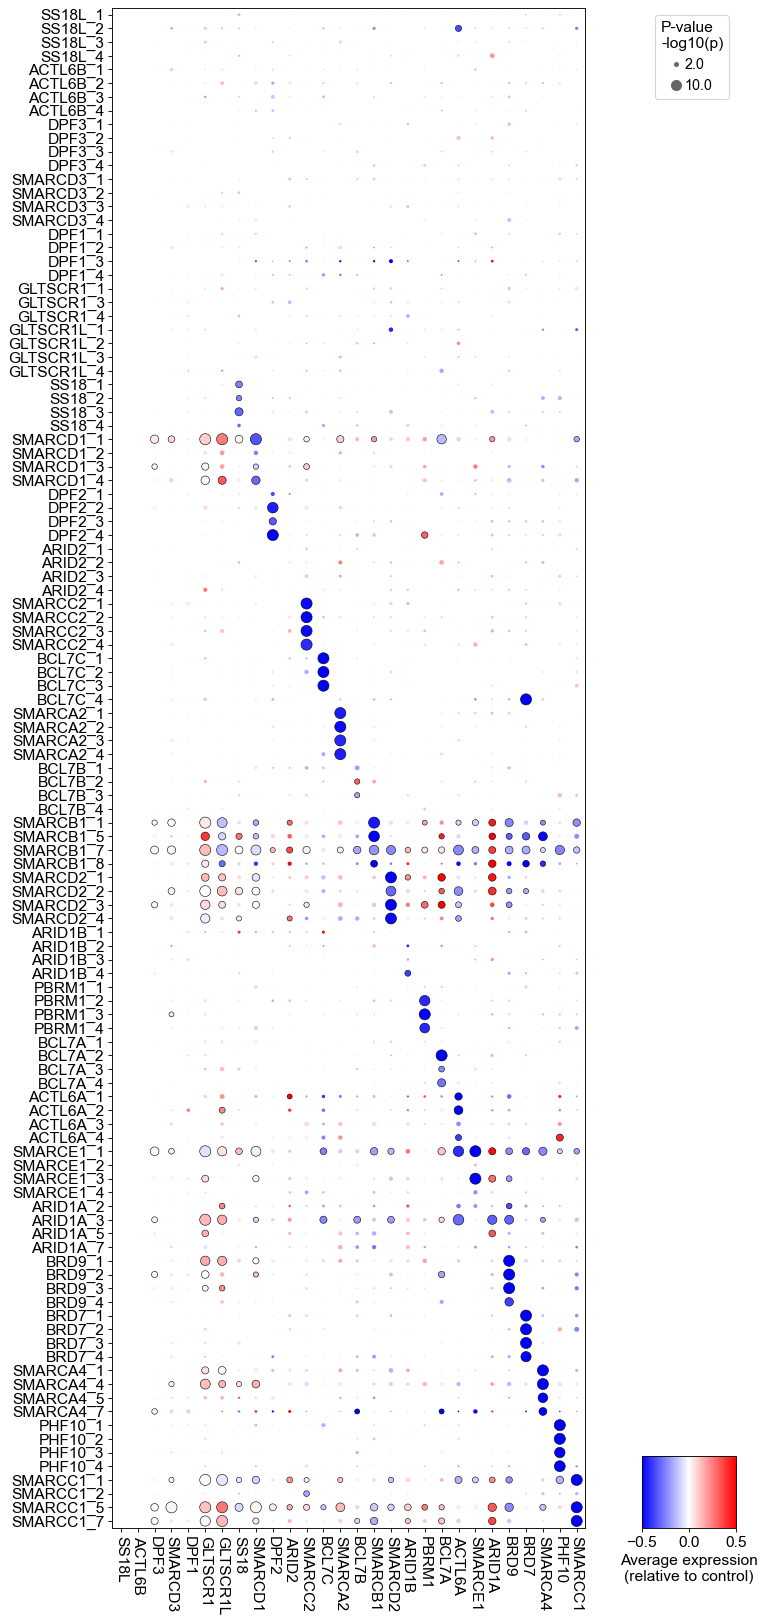

In [52]:
perturb.pl.dotplot2(x[0],x[1],genes[::-1],ordered_guides[5:],w=10,h=25,best_p=1e-10,
        title='Average expression\n(relative to control)')
plt.savefig(FIGS+'guide.ko.dotplot.pdf',transparent=True)
plt.savefig(FIGS+'guide.ko.dotplot.png',transparent=True)

In [57]:
adata_var=adata[:,adata.var_names[adata.var['highly_variable']]]
adata_var._init_as_actual(adata_var.copy())
adata_var

AnnData object with n_obs × n_vars = 52152 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'SMARCC2_3', 'BCL7C_4', 'BRD7_4', 'ACTL6B_2', 'PBRM1_4', 'SMARCA2_1', 'SMARCE1_1', 'PBRM1_3', 'SMARCE1_2', 'GLTSCR1L_3', 'PHF10_3', 'BRD7_3', 'GLTSCR1L_2', 'ARID2_4', 'ARID1A_3', 'SS18_2', 'DPF1_3', 'SMARCA4_1', 'DPF3_2', 'ACTL6A_3', 'DPF3_3', 'SMARCA4_7', 'PBRM1_1', 'BCL7A_2', 'ARID1A_7', 'BCL7C_3', 'GLTSCR1_1', 'SMARCD3_1', 'GLTSCR1_4', 'DPF1_1', 'SMARCD1_2', 'SMARCD3_3', 'SMARCE1_3', 'ARID1B_1', 'BCL7C_1', 'NTC6_IG1216445', 'SMARCC2_1', 'SMARCA4_5', 'ARID1B_2', 'ARID2_2', 'BCL7A_3', 'DPF2_3', 'SMARCE1_4', 'PHF10_1', 'BRD9_1', 'SMARCD2_1', 'SMARCC1_1', 'SMARCD2_2', 'SMARCC1_5', 'NTC1_IG345439', 'DPF1_4', 'ACTL6B_4', 'PHF10_4', 'SMARCA2_2', 'ACTL6A_2', 'SS18

In [58]:
perturb.tl.bulk(adata_var,'guide.compact')

In [59]:
perturb.tl.bulk(adata_var,'gene.compact')

In [60]:
adata_var.uns['bulk.guide.compact.corr']=perturb.util.corr_mat(adata_var.uns['bulk.guide.compact'])



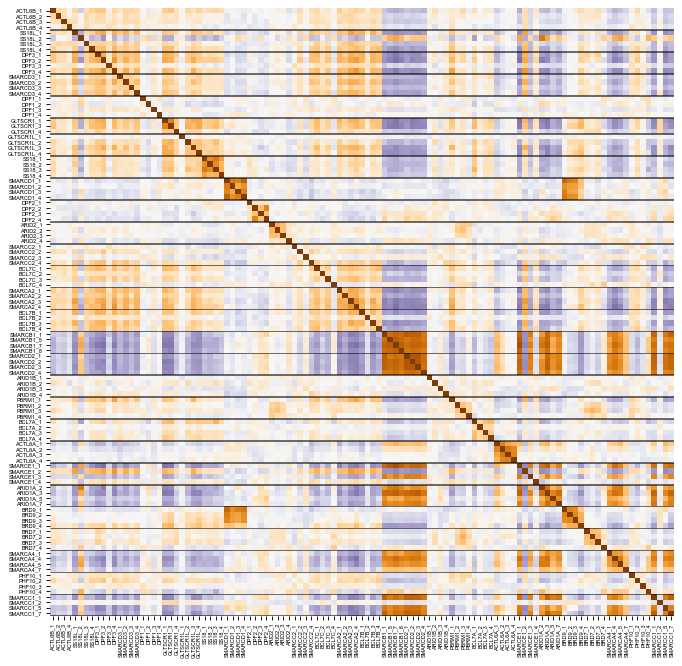

In [61]:
fig,plots=plt.subplots(1)
fig.set_size_inches(10,10)
vmin=-1
vmax=1

perturbations_sort=ordered_guides[5:][::-1]
plots.matshow(adata_var.uns['bulk.guide.compact.corr'].loc[perturbations_sort,
                                                            perturbations_sort[::-1]],
             aspect='auto',cmap='PuOr_r',vmin=vmin,vmax=vmax)
plots.set_xticks([])
plots.grid(False)
plots.yaxis.set_ticks_position('left')
plots.set_yticks(range(len(perturbations_sort)))
plots.set_yticklabels(perturbations_sort,fontsize=5)
plots.set_xticks(range(len(perturbations_sort)))
plots.set_xticklabels(perturbations_sort[::-1],fontsize=5,rotation=90)
plots.xaxis.set_ticks_position('bottom')
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(False)
plots.spines['top'].set_visible(False)
plots.spines['bottom'].set_visible(False)
plots.set_ylim(-0.5,len(perturbations_sort)-0.5)
plots.set_xlim(-0.5,len(perturbations_sort)-0.5)


from matplotlib.patches import Rectangle
prev_gene='nothing'
prev_pert='nothing'
for i in range(len(perturbations_sort)):
    p=perturbations_sort[i]
    gene=p.split('_')[0]
    if gene!=prev_gene:
        plots.add_patch(Rectangle((-0.5,i-0.5), 
                               len(perturbations_sort), 0.1, 
                               edgecolor='black', fill=False, lw=0.5))
    prev_gene=gene

plt.savefig(FIGS+'guide.corr.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'guide.corr.heatmap.png',transparent=True,bbox_inches='tight')


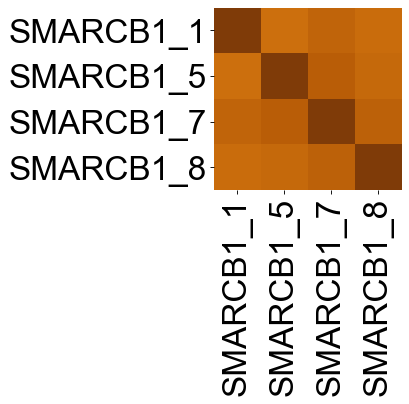

In [101]:
fig,plots=plt.subplots(1)
fig.set_size_inches(3,3)
vmin=-1
vmax=1

perturbations_sort=['SMARCB1_1','SMARCB1_5','SMARCB1_7','SMARCB1_8'][::-1]
plots.matshow(adata_var.uns['bulk.guide.compact.corr'].loc[perturbations_sort,
                                                            perturbations_sort[::-1]],
             aspect='auto',cmap='PuOr_r',vmin=vmin,vmax=vmax)
plots.set_xticks([])
plots.grid(False)
plots.yaxis.set_ticks_position('left')
plots.set_yticks(range(len(perturbations_sort)))
plots.set_yticklabels(perturbations_sort,fontsize=30)
plots.set_xticks(range(len(perturbations_sort)))
plots.set_xticklabels(perturbations_sort[::-1],fontsize=30,rotation=90)
plots.xaxis.set_ticks_position('bottom')
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(False)
plots.spines['top'].set_visible(False)
plots.spines['bottom'].set_visible(False)
plots.set_ylim(-0.5,len(perturbations_sort)-0.5)
plots.set_xlim(-0.5,len(perturbations_sort)-0.5)


plt.savefig(FIGS+'guide.corr.SMARCB1.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'guide.corr.SMARCB1.heatmap.png',transparent=True,bbox_inches='tight')


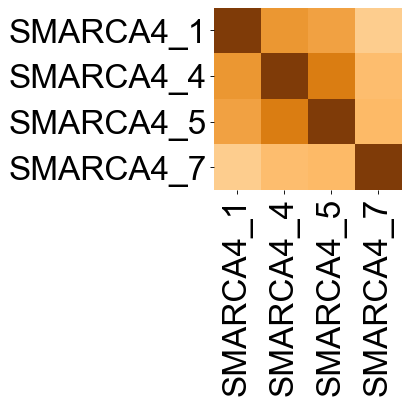

In [102]:
fig,plots=plt.subplots(1)
fig.set_size_inches(3,3)
vmin=-1
vmax=1

perturbations_sort=['SMARCA4_1','SMARCA4_4','SMARCA4_5','SMARCA4_7'][::-1]
plots.matshow(adata_var.uns['bulk.guide.compact.corr'].loc[perturbations_sort,
                                                            perturbations_sort[::-1]],
             aspect='auto',cmap='PuOr_r',vmin=vmin,vmax=vmax)
plots.set_xticks([])
plots.grid(False)
plots.yaxis.set_ticks_position('left')
plots.set_yticks(range(len(perturbations_sort)))
plots.set_yticklabels(perturbations_sort,fontsize=30)
plots.set_xticks(range(len(perturbations_sort)))
plots.set_xticklabels(perturbations_sort[::-1],fontsize=30,rotation=90)
plots.xaxis.set_ticks_position('bottom')
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(False)
plots.spines['top'].set_visible(False)
plots.spines['bottom'].set_visible(False)
plots.set_ylim(-0.5,len(perturbations_sort)-0.5)
plots.set_xlim(-0.5,len(perturbations_sort)-0.5)


plt.savefig(FIGS+'guide.corr.SMARCA4.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'guide.corr.SMARCA4.heatmap.png',transparent=True,bbox_inches='tight')


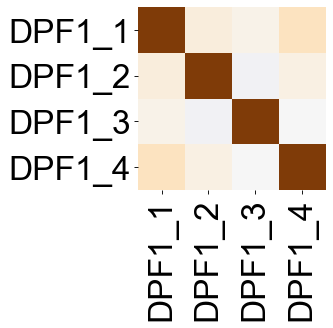

In [103]:
fig,plots=plt.subplots(1)
fig.set_size_inches(3,3)
vmin=-1
vmax=1

perturbations_sort=['DPF1_1','DPF1_2','DPF1_3','DPF1_4'][::-1]
plots.matshow(adata_var.uns['bulk.guide.compact.corr'].loc[perturbations_sort,
                                                            perturbations_sort[::-1]],
             aspect='auto',cmap='PuOr_r',vmin=vmin,vmax=vmax)
plots.set_xticks([])
plots.grid(False)
plots.yaxis.set_ticks_position('left')
plots.set_yticks(range(len(perturbations_sort)))
plots.set_yticklabels(perturbations_sort,fontsize=30)
plots.set_xticks(range(len(perturbations_sort)))
plots.set_xticklabels(perturbations_sort[::-1],fontsize=30,rotation=90)
plots.xaxis.set_ticks_position('bottom')
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(False)
plots.spines['top'].set_visible(False)
plots.spines['bottom'].set_visible(False)
plots.set_ylim(-0.5,len(perturbations_sort)-0.5)
plots.set_xlim(-0.5,len(perturbations_sort)-0.5)


plt.savefig(FIGS+'guide.corr.DPF1.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'guide.corr.DPF1.heatmap.png',transparent=True,bbox_inches='tight')


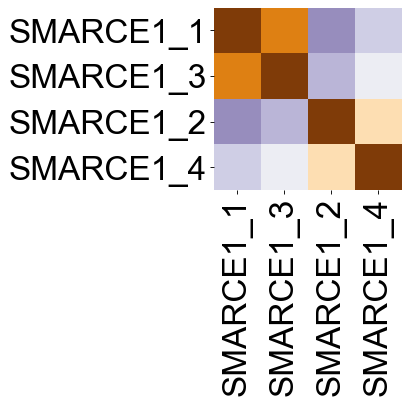

In [120]:
fig,plots=plt.subplots(1)
fig.set_size_inches(3,3)
vmin=-1
vmax=1

perturbations_sort=['SMARCE1_1','SMARCE1_3','SMARCE1_2','SMARCE1_4'][::-1]
plots.matshow(adata_var.uns['bulk.guide.compact.corr'].loc[perturbations_sort,
                                                            perturbations_sort[::-1]],
             aspect='auto',cmap='PuOr_r',vmin=vmin,vmax=vmax)
plots.set_xticks([])
plots.grid(False)
plots.yaxis.set_ticks_position('left')
plots.set_yticks(range(len(perturbations_sort)))
plots.set_yticklabels(perturbations_sort,fontsize=30)
plots.set_xticks(range(len(perturbations_sort)))
plots.set_xticklabels(perturbations_sort[::-1],fontsize=30,rotation=90)
plots.xaxis.set_ticks_position('bottom')
plots.spines['right'].set_visible(False)
plots.spines['left'].set_visible(False)
plots.spines['top'].set_visible(False)
plots.spines['bottom'].set_visible(False)
plots.set_ylim(-0.5,len(perturbations_sort)-0.5)
plots.set_xlim(-0.5,len(perturbations_sort)-0.5)


plt.savefig(FIGS+'guide.corr.SMARCE1.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'guide.corr.SMARCE1.heatmap.png',transparent=True,bbox_inches='tight')




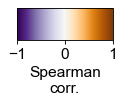

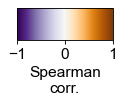

In [119]:
import matplotlib as mpl


def plot_colorbar(left=0.05,top=0.8,w=0.3,h=0.1,
                  vmin=None,vmax=None,
                  cmap=plt.cm.bwr,
                  label='Here is a label!',
                  include_zero=True,
                  outname=None,
                 ):
    fig = plt.figure()
    ax = fig.add_axes([left,top,w,h])

    ticks=[vmin,vmax]
    if include_zero:
        ticks=[vmin,0,vmax]
    cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                                   cmap=cmap,
                                   norm=mpl.colors.Normalize(vmin,vmax),  # vmax and vmin
                                   label=label,
                                   ticks=ticks)

    plt.savefig(outname,transparent=True,bbox_inches='tight')
    
plot_colorbar(vmin=-1,vmax=1,cmap=plt.cm.PuOr_r,label='Spearman\ncorr.',
             include_zero=True,outname=FIGS+'guide.corr.colorbar.pdf')
plot_colorbar(vmin=-1,vmax=1,cmap=plt.cm.PuOr_r,label='Spearman\ncorr.',
             include_zero=True,outname=FIGS+'guide.corr.colorbar.png')

In [62]:
expr_effects=pd.DataFrame(columns=['value','condition','perturbation'])

for g in genes:       
    
    control_cells=adata.obs_names[adata.obs['control']>0]
    gcells=adata.obs_names[adata.obs[g].astype(float)>0]

    if g in adata.var_names:
        control_values=list(adata.raw[control_cells,g].X.toarray().flatten())
        g_values=list(adata.raw[gcells,g].X.toarray().flatten())
    else:
        control_values=[np.nan]
        g_values=[np.nan]
        
    expr_effects_control=pd.DataFrame({'value':control_values,
                                    'condition':'control',
                                    'perturbation':g,
                                   })
    expr_effects_g=pd.DataFrame({'value':g_values,
                                    'condition':'perturbation',
                                    'perturbation':g,
                                   })
        
    expr_effects=pd.concat([expr_effects,expr_effects_control,expr_effects_g],axis=0)

expr_effects.head()

,value,condition,perturbation
0,NaN,control,ACTL6B
0,NaN,perturbation,ACTL6B
0,NaN,control,SS18L
0,NaN,perturbation,SS18L
0,0.0,control,DPF3


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DPF2_control v.s. DPF2_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.487e-31 U_stat=1.394e+06
ARID2_control v.s. ARID2_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.503e+05
SMARCC2_control v.s. SMARCC2_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.234e-56 U_stat=2.751e+06
BCL7C_control v.s. BCL7C_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.327e-61 U_stat=2.303e+06
SMARCA2_control v.s. SMARCA2_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.956e-62 U_stat=2.834e+06
BCL7B_control v.s. BCL7B_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.634e-01 U_stat=2.455e+06
SMARCB1_

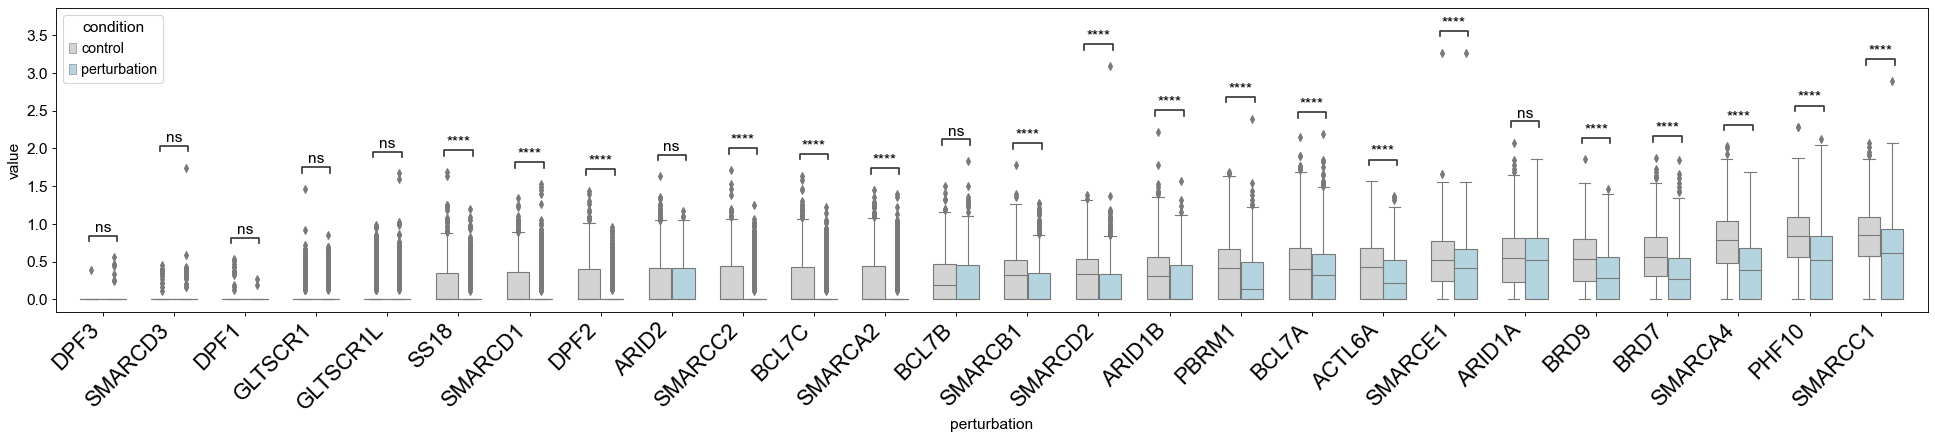

In [63]:
import seaborn as sns
from statannot import add_stat_annotation



fig, ax = plt.subplots(figsize=(30,5))

sns.boxplot(data=expr_effects, x="perturbation", y="value", 
               hue="condition",
            linewidth=1,
               ax=ax,width=0.65,
               palette={'control':'lightgray','perturbation':'lightblue'},
               #palette={"Yes": "b", "No": ".85"},
              )

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize=20)

box_pairs=[]
for gene in genes:
    if gene not in adata.var_names:
        continue
    box_pairs.append(((gene,'control'),(gene,'perturbation')))

    
add_stat_annotation(ax, data=expr_effects, x="perturbation", y="value", 
               hue="condition",
                    box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)

plt.grid(False)

plt.savefig(FIGS+'geneKOtarget.box.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'geneKOtarget.box.png',transparent=True,bbox_inches='tight')

In [64]:
expr_effects=pd.DataFrame(columns=['value','condition','perturbation'])
expr_effects_t=pd.DataFrame(columns=['guide','p'])
from scipy.stats import ttest_ind

for g in ordered_guides:        
    
    control_cells=adata.obs_names[adata.obs['control']>0]
    gcells=adata.obs_names[adata.obs[g].astype(float)>0]
    gene=g.split('_')[0]

    if gene in adata.var_names:
        print('gene',gene)
        control_values=list(adata.raw[control_cells,gene].X.toarray().flatten())
        g_values=list(adata.raw[gcells,gene].X.toarray().flatten())
    else:
        control_values=[np.nan]
        g_values=[np.nan]
        
    expr_effects_control=pd.DataFrame({'value':control_values,
                                    'condition':'control',
                                    'perturbation':g,
                                   })
    expr_effects_g=pd.DataFrame({'value':g_values,
                                    'condition':'perturbation',
                                    'perturbation':g,
                                   })
    expr_effects_t_here=pd.DataFrame({'guide':[g],
                                      'p':ttest_ind(control_values,g_values)[1],
                                     })
    expr_effects=pd.concat([expr_effects,expr_effects_control,expr_effects_g],axis=0)
    expr_effects_t=pd.concat([expr_effects_t_here,expr_effects_t],axis=0)

expr_effects.head()

/Users/ursuo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ursuo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ursuo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ursuo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ursuo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=o

gene DPF3
gene DPF3
gene DPF3
gene DPF3
gene SMARCD3
gene SMARCD3
gene SMARCD3
gene SMARCD3
gene DPF1
gene DPF1
gene DPF1
gene DPF1
gene GLTSCR1
gene GLTSCR1
gene GLTSCR1
gene GLTSCR1L
gene GLTSCR1L
gene GLTSCR1L
gene GLTSCR1L
gene SS18
gene SS18
gene SS18
gene SS18
gene SMARCD1
gene SMARCD1
gene SMARCD1
gene SMARCD1
gene DPF2
gene DPF2
gene DPF2
gene DPF2
gene ARID2
gene ARID2
gene ARID2
gene ARID2
gene SMARCC2
gene SMARCC2
gene SMARCC2
gene SMARCC2
gene BCL7C
gene BCL7C
gene BCL7C
gene BCL7C
gene SMARCA2
gene SMARCA2
gene SMARCA2
gene SMARCA2
gene BCL7B
gene BCL7B
gene BCL7B
gene BCL7B
gene SMARCB1
gene SMARCB1
gene SMARCB1
gene SMARCB1
gene SMARCD2
gene SMARCD2
gene SMARCD2
gene SMARCD2
gene ARID1B
gene ARID1B
gene ARID1B
gene ARID1B
gene PBRM1
gene PBRM1
gene PBRM1
gene PBRM1
gene BCL7A
gene BCL7A
gene BCL7A
gene BCL7A
gene ACTL6A
gene ACTL6A
gene ACTL6A
gene ACTL6A
gene SMARCE1
gene SMARCE1
gene SMARCE1
gene SMARCE1
gene ARID1A
gene ARID1A
gene ARID1A
gene ARID1A
gene BRD9
gene BR

,value,condition,perturbation
0,NaN,control,NTC1_IG345439
0,NaN,perturbation,NTC1_IG345439
0,NaN,control,NTC2_IG216151
0,NaN,perturbation,NTC2_IG216151
0,NaN,control,NTC5_mNTC100A67005


In [65]:
expr_effects_t2=expr_effects_t.iloc[:111,:]
expr_effects_t2

,guide,p
0,SMARCC1_7,4.384074e-96
0,SMARCC1_5,4.235206e-46
0,SMARCC1_2,2.190210e-02
0,SMARCC1_1,6.165520e-39
0,PHF10_4,8.681820e-23
...,...,...
0,SS18L_1,NaN
0,ACTL6B_4,NaN
0,ACTL6B_3,NaN
0,ACTL6B_2,NaN


In [66]:
from statsmodels.stats.multitest import multipletests

expr_effects_t2['p.adj']=multipletests(expr_effects_t2['p'])[1]

<ipython-input-66-24e026e450e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expr_effects_t2['p.adj']=multipletests(expr_effects_t2['p'])[1]


In [67]:
FDR=0.01

total=expr_effects_t2.shape
print('total',total)
print('sigs',expr_effects_t2.loc[expr_effects_t2['p.adj']<=FDR,:].shape[0])


total (111, 3)
sigs 64


In [68]:
print('sigs',expr_effects_t2.loc[expr_effects_t2['p.adj']>FDR,:].shape[0])
print('sigs',expr_effects_t2.loc[expr_effects_t2['p.adj']>FDR,:])

sigs 39
sigs         guide         p     p.adj
0   SMARCC1_2  0.021902  0.587624
0    ARID1A_7  0.525892  1.000000
0    ARID1A_2  0.456167  0.999998
0   SMARCE1_2  0.001347  0.057566
0    ACTL6A_3  0.000774  0.034998
0     BCL7A_1  0.328086  0.999952
0     PBRM1_1  0.055644  0.879766
0    ARID1B_3  0.006438  0.242491
0    ARID1B_2  0.020232  0.567436
0    ARID1B_1  0.883768  1.000000
0   SMARCB1_7  0.064756  0.910197
0     BCL7B_4  0.434416  0.999998
0     BCL7B_1  0.000573  0.026582
0     BCL7C_4  0.979851  1.000000
0     ARID2_4  0.617614  1.000000
0     ARID2_3  0.374895  0.999987
0     ARID2_2  0.076021  0.937170
0     ARID2_1  0.303073  0.999928
0      DPF2_1  0.001056  0.046417
0   SMARCD1_3  0.205380  0.998964
0  GLTSCR1L_4  0.026210  0.645062
0  GLTSCR1L_3  0.727008  1.000000
0  GLTSCR1L_2  0.695524  1.000000
0  GLTSCR1L_1  0.089965  0.959451
0   GLTSCR1_4  0.204733  0.998964
0   GLTSCR1_3  0.455418  0.999998
0   GLTSCR1_1  0.011037  0.372583
0      DPF1_4  0.950999  1.000000
0

In [ ]:
#guides that don't show the effect of the other guides for the gene
#SMARCC1_2,
#PBRM1_1 (looks diff)
#3 ARID1Bs no NMD, 
#SMARCB1_7
#BCL7C_4
#1 ARID2
#DPF2_1

#=9

#SMARCE1_2, SMARCE1_4, GLTSCR1L_1, BCL7C_4

In [ ]:
#guides that didn't do NMD
#ARID1A_2,ARID1A_7,SMARCE1_2,BCL7A_1,ACTL6A_3(looks good, just lower levels of effect)
#2BCL7Bs,
#3 ARID2s
#SMARCd1_3

#=11

In [ ]:
#others
#ACTL6A_3 - looks good, just lower levels of effect


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DPF3_1_control v.s. DPF3_1_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.312e+05
DPF3_2_control v.s. DPF3_2_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.412e+05
DPF3_3_control v.s. DPF3_3_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.737e+05
DPF3_4_control v.s. DPF3_4_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.064e+05
SMARCD3_1_control v.s. SMARCD3_1_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.955e+05
SMARCD3_2_control v.s. SMARCD3_2_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=

SMARCD2_3_control v.s. SMARCD2_3_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.008e-14 U_stat=3.056e+05
SMARCD2_4_control v.s. SMARCD2_4_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.519e-12 U_stat=3.704e+05
ARID1B_1_control v.s. ARID1B_1_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.636e+04
ARID1B_2_control v.s. ARID1B_2_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.418e+04
ARID1B_3_control v.s. ARID1B_3_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.574e-01 U_stat=2.016e+05
ARID1B_4_control v.s. ARID1B_4_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.679e-03 U_stat=2.906e+05
PBRM1_1_control v.s. PBRM1_1_perturbation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.371e+

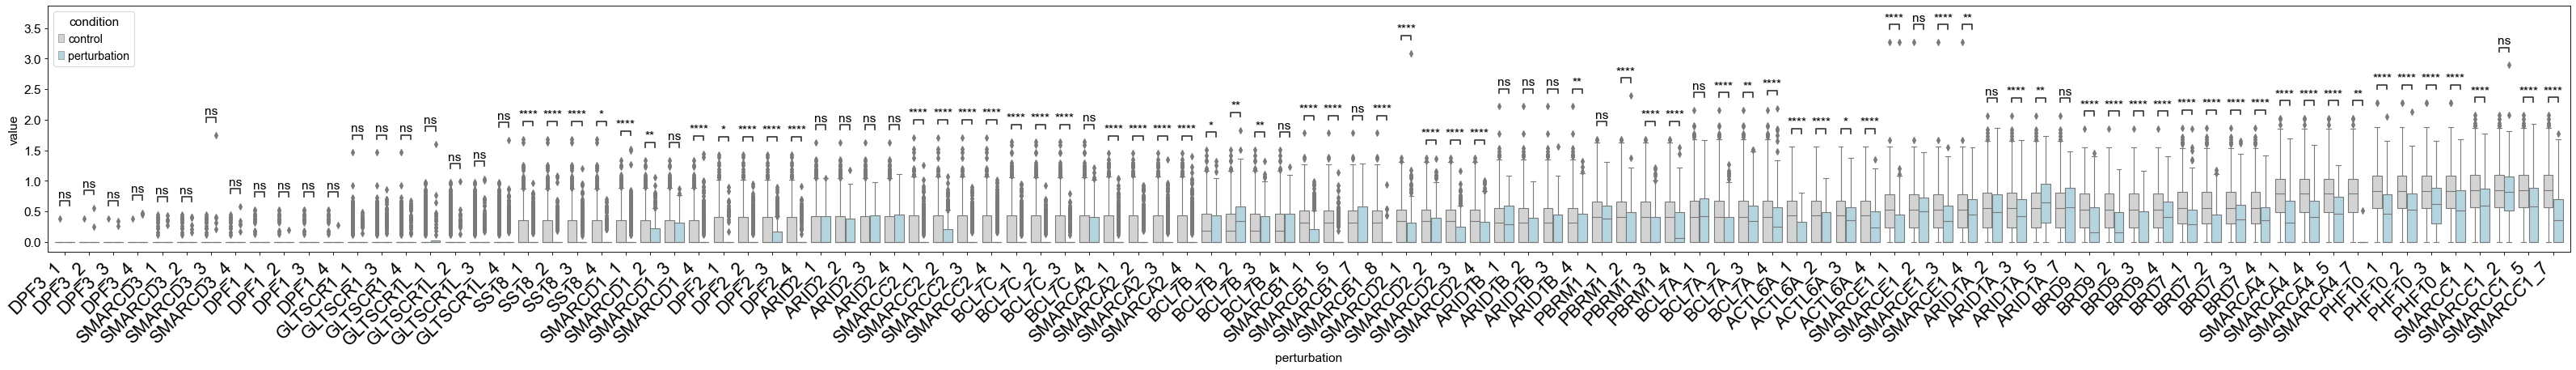

In [69]:
import seaborn as sns
from statannot import add_stat_annotation



fig, ax = plt.subplots(figsize=(50,5))

sns.boxplot(data=expr_effects, x="perturbation", y="value", 
               hue="condition",
            linewidth=1,
               ax=ax,
               palette={'control':'lightgray','perturbation':'lightblue'},
               #palette={"Yes": "b", "No": ".85"},
              )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize=20)

box_pairs=[]
for g in ordered_guides:
    gene=g.split('_')[0]
    if gene not in adata.var_names:
        continue
    box_pairs.append(((g,'control'),(g,'perturbation')))
    
add_stat_annotation(ax, data=expr_effects, x="perturbation", y="value", 
               hue="condition",
                    box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)

plt.grid(False)
plt.savefig(FIGS+'guideKOtarget.box.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'guideKOtarget.box.png',transparent=True,bbox_inches='tight')

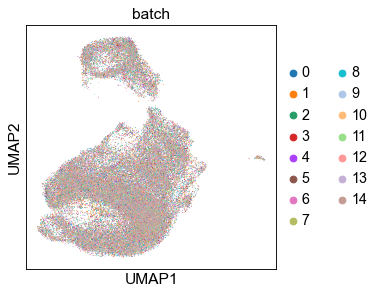

In [70]:
sc.pl.umap(adata,color='batch')

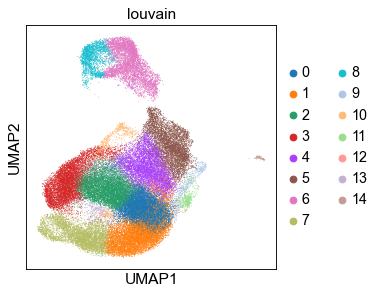

In [71]:
sc.pl.umap(adata,color='louvain')